In [2]:
from ipywidgets import IntProgress
from IPython.display import display
import time

from covid19_vulnerabilidad_mex.datos import *
from covid19_vulnerabilidad_mex.vulnerabilidad import *

import pandas as pd
import geopandas as gpd

import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import timedelta
import datetime
from datetime import timedelta, date, datetime

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_decomposition import PLSRegression

import seaborn as sns
import imageio
from pygifsicle import optimize

plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

# Dimensiones de las variables

A partir de una clasificación de las variables en las dimensiones del artículo de Acharya aquí vamos a hacer algunas visualizaciones del índice.

Primero lo que hacemos es calcular la serie de tiempo de vulnerabilidad usando la tasa de mortalidad y las ariables reclasificadas

In [3]:
antier = date.today() - timedelta(days=2)
fecha_analisis = antier - timedelta(weeks=2)
fecha_analisis = pd.to_datetime(fecha_analisis)
metodo = 'PLS'
ventana_dias = 28
inicio = pd.to_datetime('20-05-01', yearfirst=True)
fin = antier - timedelta(days=7)
actualizar_datos_salud(fecha_inicio='18-02-2021')

In [4]:
serie_municipal = serie_covid_indicadores_municipales(antier.strftime('%y%m%d'),
                                                      acumulativa=False,
                                                      dias=ventana_dias,
                                                      indicadores='datos/municipios/indicadores_reclasificados.csv')
serie_municipal[['conteo', 'defunciones']] = serie_municipal[[f'conteo_{ventana_dias}dias',
                                                              f'defunciones_{ventana_dias}dias']]
serie_municipal = serie_municipal.drop(columns=[f'conteo_{ventana_dias}dias',
                                   f'defunciones_{ventana_dias}dias'])                                                              
serie_municipal = agregar_tasas_municipales(serie_municipal)

/home/datalab/app/covid19_vulnerabilidad_mex/datos.py:242: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['SEMANA_AÑO_INGRESO'] = df.index.week


In [5]:
serie_municipal

,FECHA_INGRESO,ENTIDAD_RES,CLAVE_ENTIDAD_RES,MUNICIPIO_RES,CLAVE_MUNICIPIO_RES,RESULTADO,conteo,defunciones,geometry,pt_2015,...,pct_obesidad,pct_hipertension,pct_diabetes,total_camas_publicos,total_camas_privados,total_hospitales_publicos,total_hospitales_privados,covid_confirmados_100k,covid_defun_100k,tasa_covid_letal
1,2020-02-23,AGUASCALIENTES,01,AGUASCALIENTES,01001,Positivo SARS-CoV-2,0.0,0.0,"POLYGON ((-102.09775 22.02325, -102.11598 22.0...",877190,...,31.486541,14.942242,7.495861,0.959461,0.993091,0.981481,0.965385,0.000000,0.0,NaN
5,2020-02-24,AGUASCALIENTES,01,AGUASCALIENTES,01001,Positivo SARS-CoV-2,0.0,0.0,"POLYGON ((-102.09775 22.02325, -102.11598 22.0...",877190,...,31.486541,14.942242,7.495861,0.959461,0.993091,0.981481,0.965385,0.000000,0.0,NaN
12,2020-02-25,AGUASCALIENTES,01,AGUASCALIENTES,01001,Positivo SARS-CoV-2,0.0,0.0,"POLYGON ((-102.09775 22.02325, -102.11598 22.0...",877190,...,31.486541,14.942242,7.495861,0.959461,0.993091,0.981481,0.965385,0.000000,0.0,NaN
17,2020-02-26,AGUASCALIENTES,01,AGUASCALIENTES,01001,Positivo SARS-CoV-2,0.0,0.0,"POLYGON ((-102.09775 22.02325, -102.11598 22.0...",877190,...,31.486541,14.942242,7.495861,0.959461,0.993091,0.981481,0.965385,0.000000,0.0,NaN
23,2020-02-27,AGUASCALIENTES,01,AGUASCALIENTES,01001,Positivo SARS-CoV-2,0.0,0.0,"POLYGON ((-102.09775 22.02325, -102.11598 22.0...",877190,...,31.486541,14.942242,7.495861,0.959461,0.993091,0.981481,0.965385,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530825,2021-02-28,ZACATECAS,32,SANTA MARÍA DE LA PAZ,32058,Positivo SARS-CoV-2,3.0,0.0,"POLYGON ((-103.19774 21.58534, -103.23388 21.5...",2656,...,25.364136,21.230514,11.442311,0.991437,1.000000,0.824074,0.909615,105.078809,0.0,0.0
4530829,2021-03-01,ZACATECAS,32,SANTA MARÍA DE LA PAZ,32058,Positivo SARS-CoV-2,3.0,0.0,"POLYGON ((-103.19774 21.58534, -103.23388 21.5...",2656,...,25.364136,21.230514,11.442311,0.991437,1.000000,0.824074,0.909615,105.078809,0.0,0.0
4530834,2021-03-02,ZACATECAS,32,SANTA MARÍA DE LA PAZ,32058,Positivo SARS-CoV-2,3.0,0.0,"POLYGON ((-103.19774 21.58534, -103.23388 21.5...",2656,...,25.364136,21.230514,11.442311,0.991437,1.000000,0.824074,0.909615,105.078809,0.0,0.0
4530840,2021-03-03,ZACATECAS,32,SANTA MARÍA DE LA PAZ,32058,Positivo SARS-CoV-2,3.0,0.0,"POLYGON ((-103.19774 21.58534, -103.23388 21.5...",2656,...,25.364136,21.230514,11.442311,0.991437,1.000000,0.824074,0.909615,105.078809,0.0,0.0


In [6]:
modelos, serie = periodo_vulnerabilidad_con_dataframe(
            serie_municipal,
            inicio,
            fin,
            min_casos=10,
            columna='covid_defun_100k',
            rf=False
        )

IntProgress(value=0, max=302)

<AxesSubplot:xlabel='FECHA_INGRESO', ylabel='valor_covid_defun_100k'>

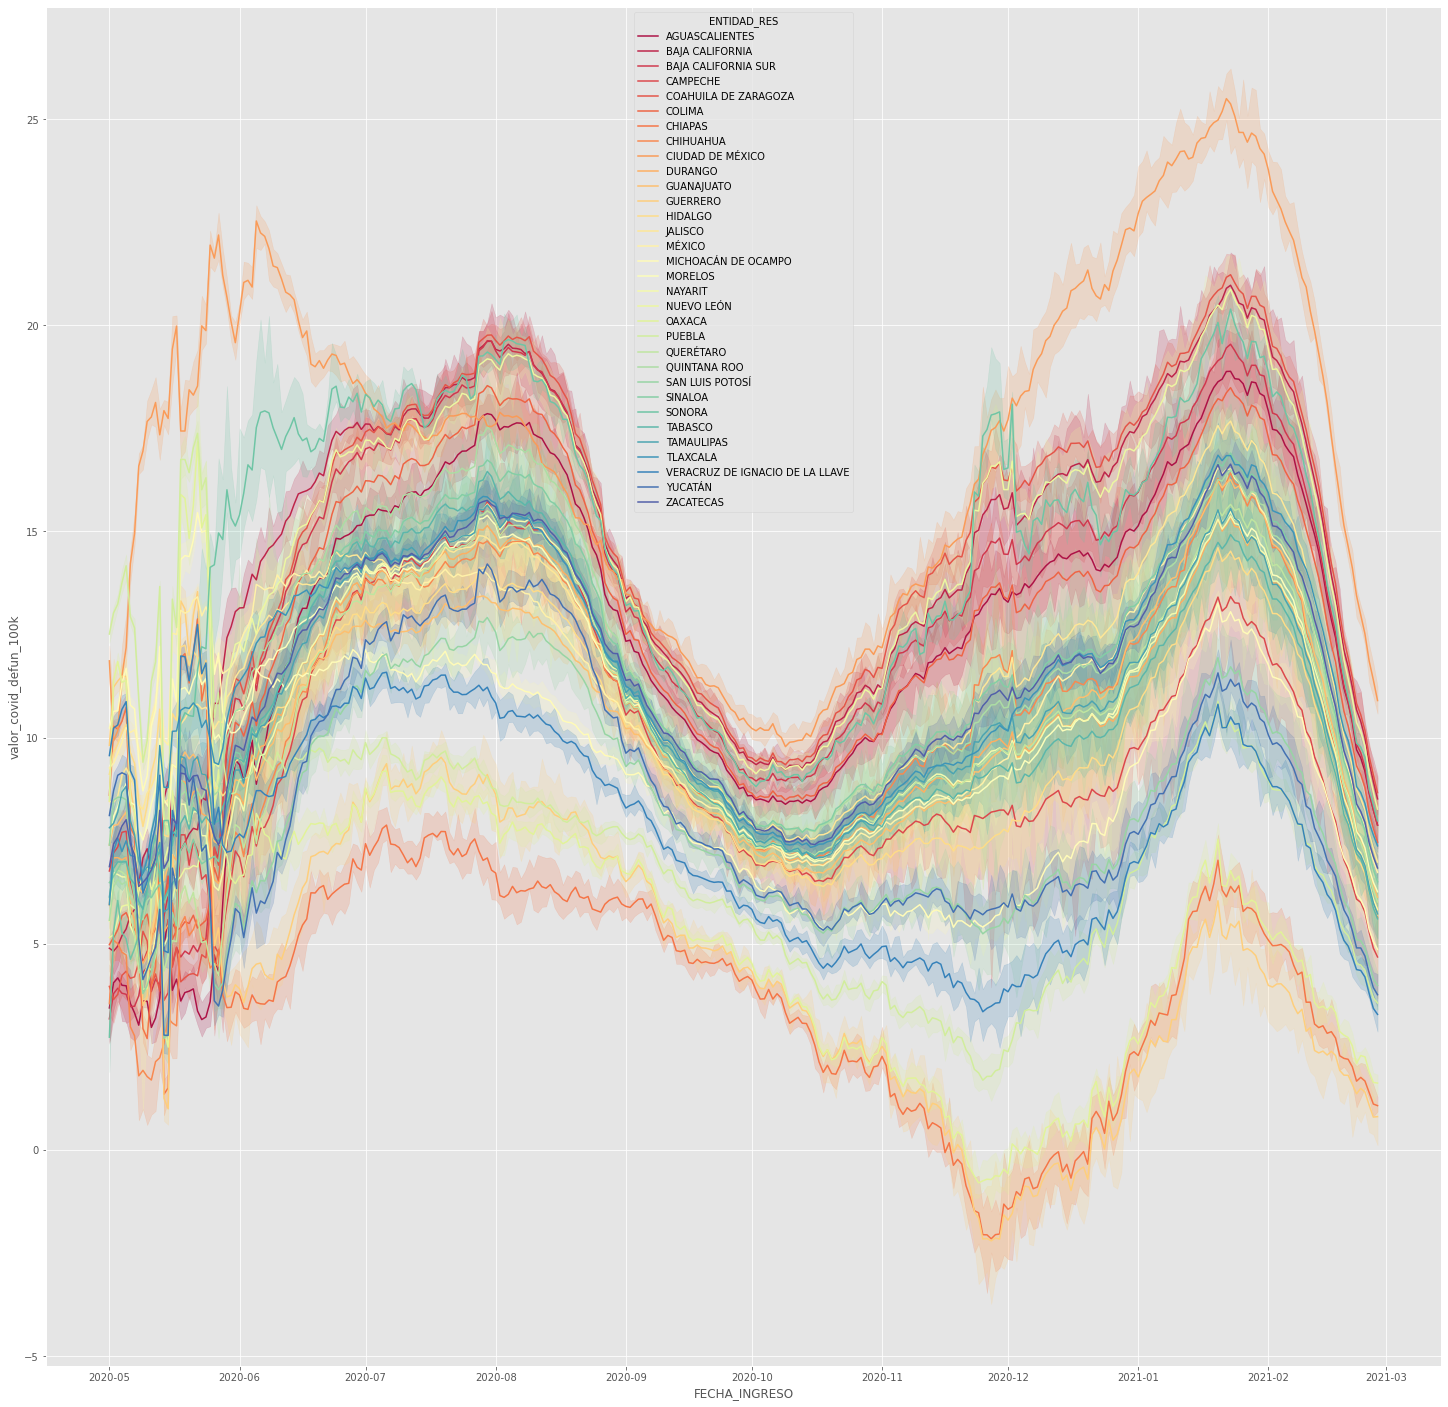

In [7]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.lineplot(data=serie,
             x='FECHA_INGRESO', y=f'valor_covid_defun_100k',
             hue='ENTIDAD_RES', palette='Spectral',
             n_boot=10)

## Importancia por dimensión

In [8]:
dimensiones = pd.read_csv("datos/diccionario_variables_usadas.csv")
modelos = modelos.merge(dimensiones, left_on='caracteristica', right_on='campo').drop(columns=['campo', 'descriptor'])
modelos

,caracteristica,coef,dia_ajuste,modelo,dimension
0,lmex_2015,-0.093845,2020-05-01,PLS,Socioeconomic
1,lmex_2015,-0.092427,2020-05-02,PLS,Socioeconomic
2,lmex_2015,-0.098647,2020-05-03,PLS,Socioeconomic
3,lmex_2015,-0.098100,2020-05-04,PLS,Socioeconomic
4,lmex_2015,-0.093408,2020-05-05,PLS,Socioeconomic
...,...,...,...,...,...
11812,plbm,-0.112735,2021-02-23,PLS,Socioeconomic
11813,plbm,-0.105545,2021-02-24,PLS,Socioeconomic
11814,plbm,-0.096100,2021-02-25,PLS,Socioeconomic
11815,plbm,-0.093944,2021-02-26,PLS,Socioeconomic


In [9]:
modelos['mediana'] = (modelos
                      .groupby('caracteristica')['coef']
                      .transform('median'))
modelos.head()

,caracteristica,coef,dia_ajuste,modelo,dimension,mediana
0,lmex_2015,-0.093845,2020-05-01,PLS,Socioeconomic,0.191057
1,lmex_2015,-0.092427,2020-05-02,PLS,Socioeconomic,0.191057
2,lmex_2015,-0.098647,2020-05-03,PLS,Socioeconomic,0.191057
3,lmex_2015,-0.098100,2020-05-04,PLS,Socioeconomic,0.191057
4,lmex_2015,-0.093408,2020-05-05,PLS,Socioeconomic,0.191057


In [17]:
modelos[modelos.caracteristica == 'consulto_1']

,caracteristica,coef,dia_ajuste,modelo,dimension,mediana
4848,consulto_1,0.172644,2020-05-01,PLS,Health Care,-0.031731
4849,consulto_1,0.020058,2020-05-02,PLS,Health Care,-0.031731
4850,consulto_1,-0.018032,2020-05-03,PLS,Health Care,-0.031731
4851,consulto_1,0.054008,2020-05-04,PLS,Health Care,-0.031731
4852,consulto_1,0.064663,2020-05-05,PLS,Health Care,-0.031731
...,...,...,...,...,...,...
5146,consulto_1,-0.041546,2021-02-23,PLS,Health Care,-0.031731
5147,consulto_1,-0.053316,2021-02-24,PLS,Health Care,-0.031731
5148,consulto_1,-0.036716,2021-02-25,PLS,Health Care,-0.031731
5149,consulto_1,-0.043003,2021-02-26,PLS,Health Care,-0.031731


In [13]:
dimensiones.campo.unique()

array(['cvegeo', 'pt_2015', 'an_2015', 'ne614_015', 'bi_2015', 'sins_15',
       'vpt_2015', 'vns_2015', 'vna_2015', 'vnd_2015', 'vne_2015',
       'vnl_2015', 'vnr_2015', 'irs_2015', 'grs_2015', 'lmex_2015',
       'pobreza', 'pobreza_pob', 'pobreza_e', 'pobreza_e_pob',
       'pobreza_m', 'pobreza_m_pob', 'vul_car', 'vul_car_pob', 'vul_ing',
       'vul_ing_pob', 'npnv', 'npnv_pob', 'ic_rezedu', 'ic_rezedu_pob',
       'ic_asalud', 'ic_asalud_pob', 'ic_segsoc', 'ic_segsoc_pob',
       'ic_cv', 'ic_cv_pob', 'ic_sbv', 'ic_sbv_pob', 'ic_ali',
       'ic_ali_pob', 'carencias', 'carencias_pob', 'carencias3',
       'carencias3_pob', 'plb', 'plb_pob', 'plbm', 'plbm_pob',
       'consulto_1', 'consultori', 'farmacias', 'pob01', 'pob_menore',
       'porc_carencia_salud', 'sin_dere_1', 'sin_derech',
       'total_camas_publicos', 'total_camas_privados',
       'total_hospitales_publicos', 'pct_hipertension', 'pct_diabetes',
       'pct_obesidad'], dtype=object)

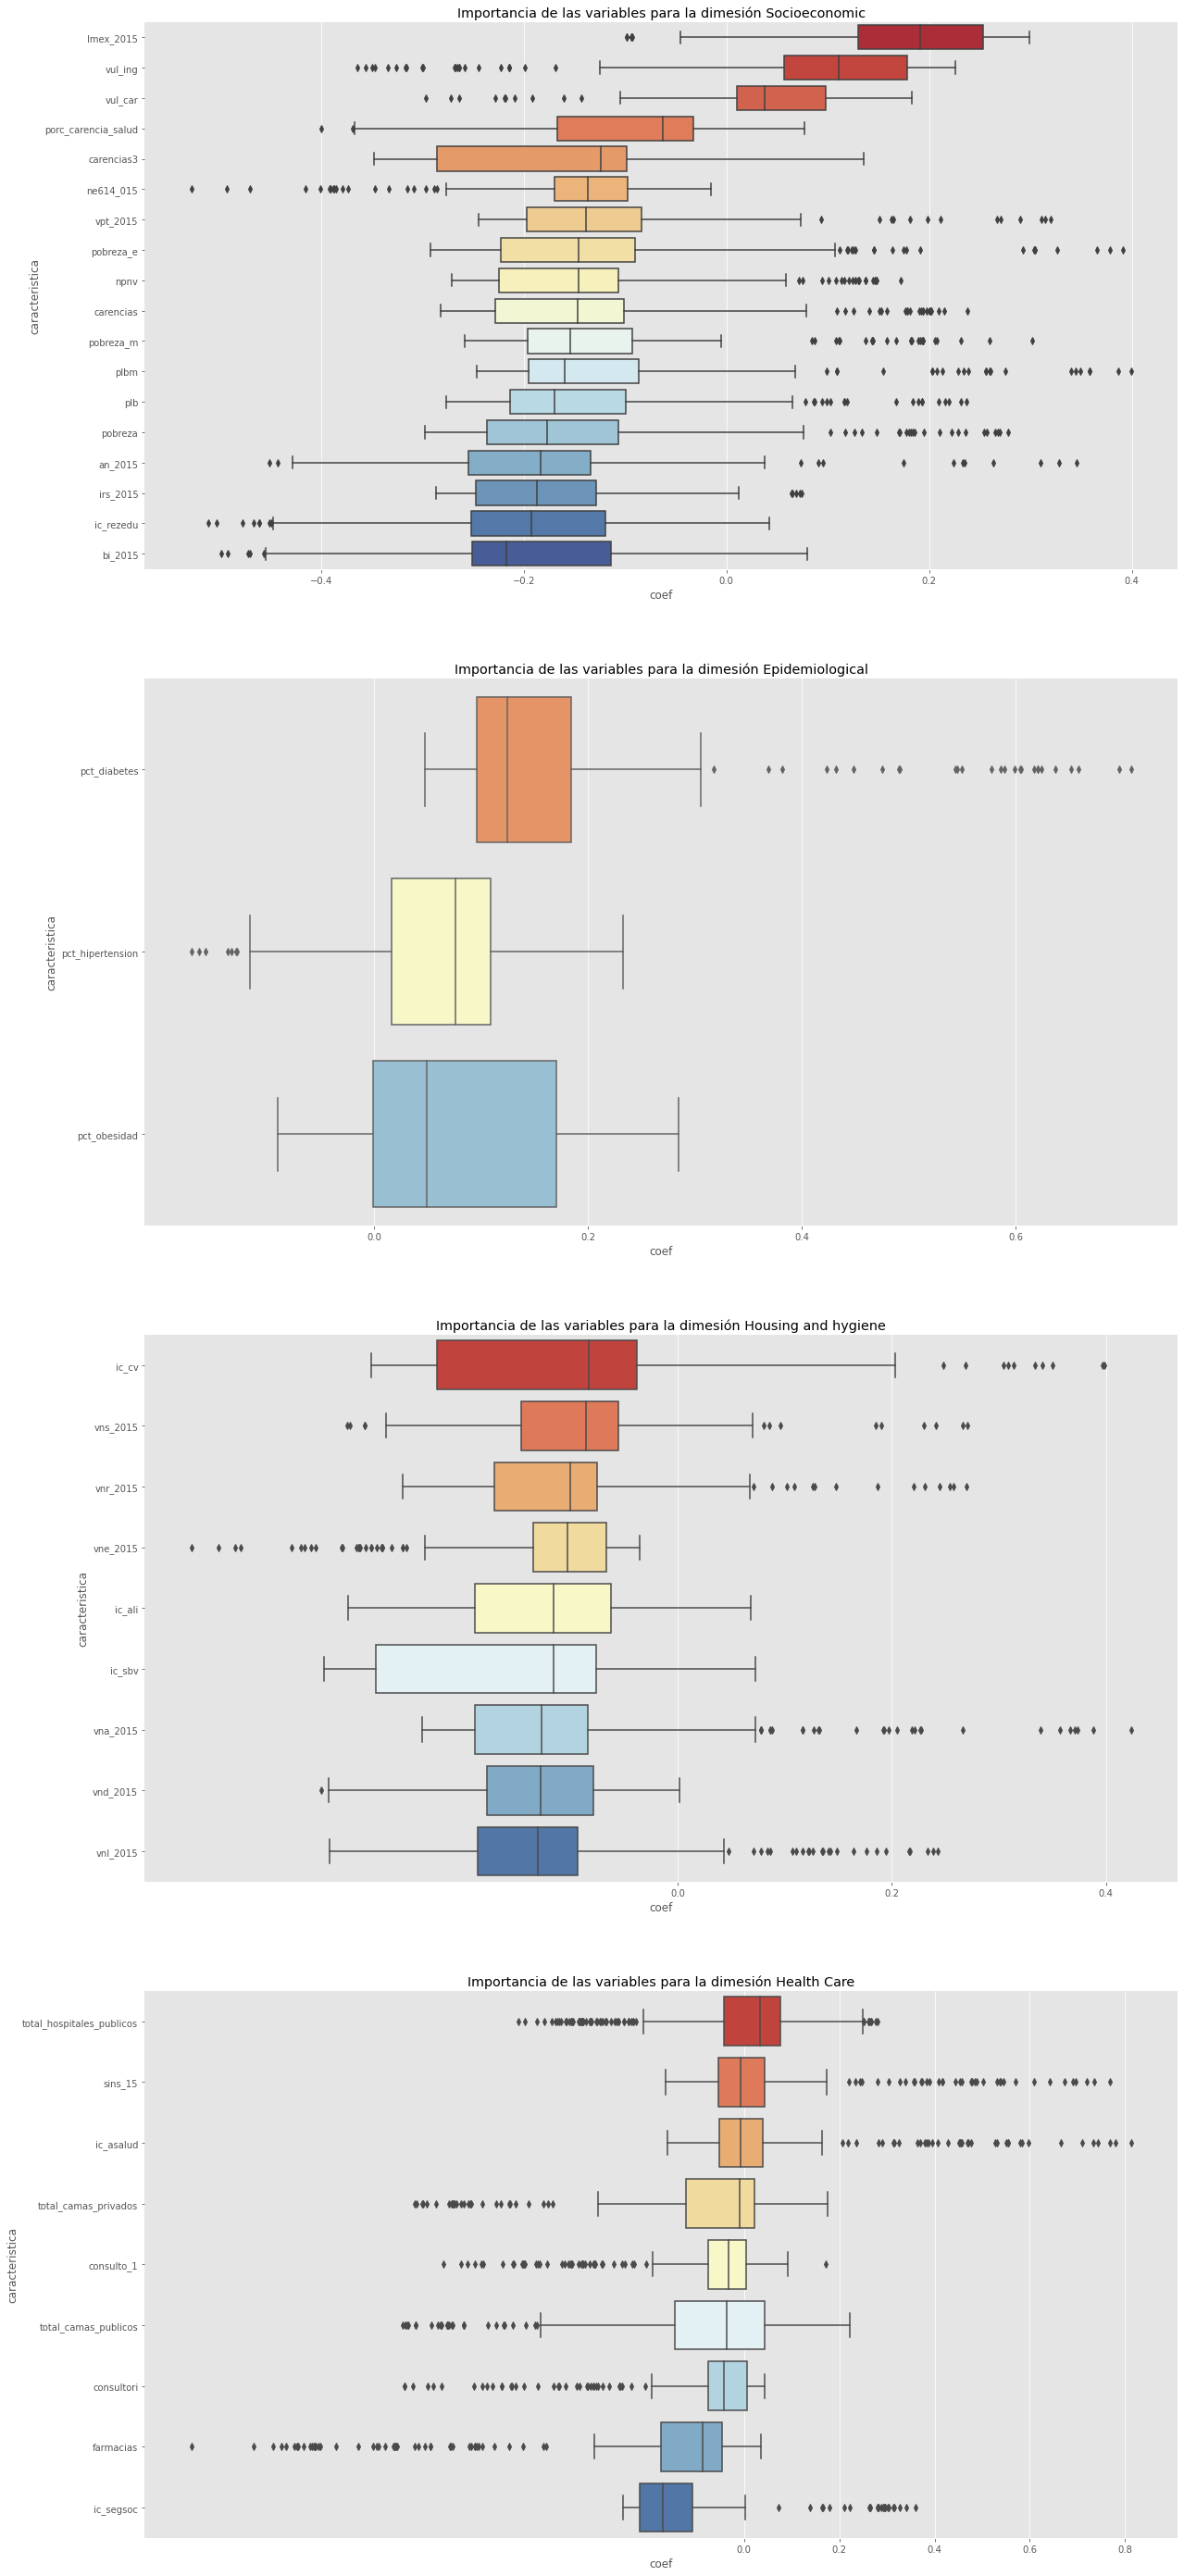

In [18]:
f, axes = plt.subplots(4,figsize=(20, 50))
lista_dimensiones = modelos.dimension.unique()
for i, ax in enumerate(axes):
    datos = modelos[modelos.dimension == lista_dimensiones[i]]
    datos = datos.sort_values(by='mediana', ascending=False)
    b = sns.boxplot(y="caracteristica", x="coef",
    data=datos,
    palette='RdYlBu',
    ax=ax)
    b.set_title(f'Importancia de las variables para la dimesión {lista_dimensiones[i]}')
    sns.despine(trim=True, left=True)
plt.savefig('img/importancia_caracteristicas_por_dimension.png', bbox_inches='tight')